In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import astropy.units as u

In [6]:
#DEFINES RECOIL VELOCITY FORMULA

#Assign fitting constants
A = 12000
B = -0.93
H = 7300
K = 60000

#Define recoil velocity operator
def calc_recoil_velocity(q, e, a_1, a_2, xi, phi_1, phi_2, theta):
    p = (q**2)/((1+q)**5)
    a_1_perp = a_1*np.sin(phi_1)
    a_2_perp = a_2*np.sin(phi_2)
    a_1_par = a_1*np.cos(phi_1)
    a_2_par = a_2*np.cos(phi_2)
    v_m = (A*p*(1-q))*(1+(B*(q/((1+q)**2)))) #velocity based on unequal mass
    v_perp =  (H*p)*(a_2_par - q*a_1_par) #velocity perpendicular to orbital angular momentum direction
    v_par = (K*p*np.cos(theta))*(a_2_perp - q*a_1_perp) #velocity parallel to orbital angular momentum direction

    #v_rec_vector = [v_m + v_perp*np.cos(xi), v_perp*np.sin(xi), v_par]
    v_rec = (1+e)*np.sqrt((v_m**2)+(v_perp**2)+(v_par**2)+2*v_m*v_perp*np.cos(xi))
    

    return v_rec

Text(0, 0.5, 'Eccentricity, e')

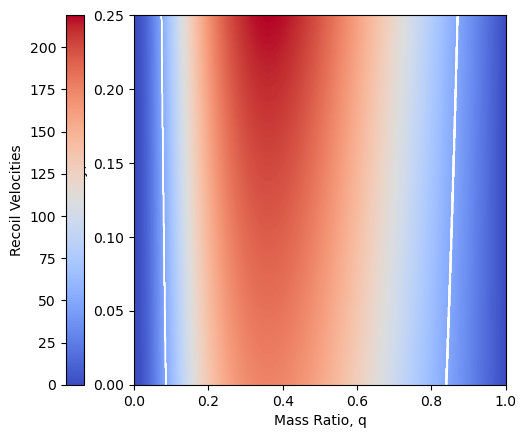

In [7]:
# MASS RATIO BY ECCENTRICITY, NO BLACK HOLE SPIN

n = 1000
q_values = np.linspace(0, 1, n)
e_values = np.linspace(0, .25, n)

recoil_velocities_e = []
for e in e_values:
    for q in q_values:
        recoil_velocity = calc_recoil_velocity(q, e, 0, 0, 0, 0, 0, 0)
        #print(recoil_velocity)
        recoil_velocities_e.append(recoil_velocity)
recoil_velocities_eplot = np.reshape(recoil_velocities_e, (n, n))

escape_velocity_e = []
for recoil in recoil_velocities_e:
    if 49 < recoil < 50:
        escape_velocity_e.append(recoil)
    else: 
        escape_velocity_e.append(0)
escape_velocity_eplot = np.reshape(escape_velocity_e, (n, n))


Q, E = np.meshgrid(q_values, e_values)
plt.pcolormesh(Q, E, recoil_velocities_eplot, cmap = cm.coolwarm)
plt.colorbar(label = 'Recoil Velocities', location = 'left')
plt.contour(Q, E, escape_velocity_eplot, colors='w', linewidths = .5)
plt.xlabel('Mass Ratio, q')
plt.ylabel('Eccentricity, e')

The max recoil velocity for this orientation is 218.38168002846825


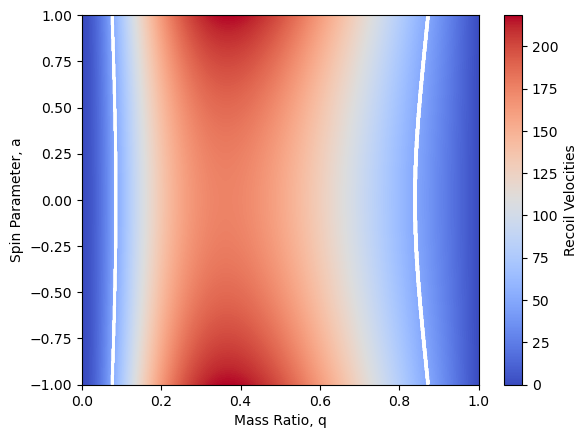

In [8]:
# MASS RATIO BY SPIN (ALIGNED, PARALLEL TO ANGULAR MOMENTUM), CIRCULAR ORBIT

n = 1000
q_values = np.linspace(0, 1, n)
a_values = np.linspace(-1, 1, n)

recoil_velocities_a = []
for a in a_values:
    for q in q_values:
        recoil_velocity = calc_recoil_velocity(q, 0, a, a, np.pi/2, 0, 0, 0)
        #print(recoil_velocity)
        recoil_velocities_a.append(recoil_velocity)
recoil_velocities_aplot = np.reshape(recoil_velocities_a, (n, n))

escape_velocity_a = []
for recoil in recoil_velocities_a:
    if 49 < recoil < 50:
        escape_velocity_a.append(recoil)
    else: 
        escape_velocity_a.append(0)
escape_velocity_aplot = np.reshape(escape_velocity_a, (n, n))

Q, A_i = np.meshgrid(q_values, a_values)
plt.pcolormesh(Q, A_i, recoil_velocities_aplot, cmap = cm.coolwarm)
plt.colorbar(label = 'Recoil Velocities')
plt.contour(Q, A_i, escape_velocity_aplot, colors='w', linewidths = 1.5)
plt.xlabel('Mass Ratio, q')
plt.ylabel('Spin Parameter, a')

print('The max recoil velocity for this orientation is', np.max(recoil_velocities_a)) 

The max recoil velocity for this orientation is 456.25


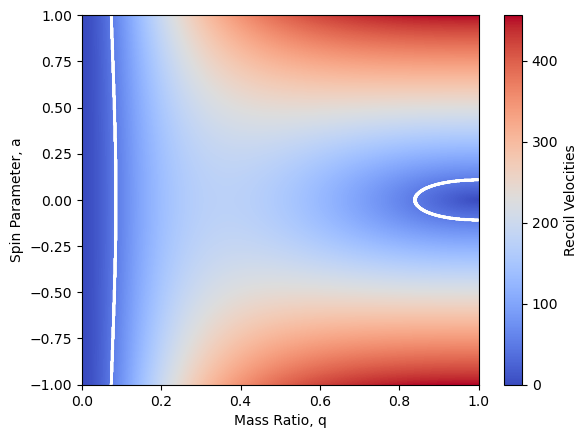

In [9]:
# MASS RATIO BY SPIN (ANTIALIGNED, PARALLEL TO ANGULAR MOMENTUM), CIRCULAR ORBIT

n = 1000
q_values = np.linspace(0, 1, n)
a_values = np.linspace(-1, 1, n)

recoil_velocities_a = []
for a in a_values:
    for q in q_values:
        recoil_velocity = calc_recoil_velocity(q, 0, -a, a, np.pi/2, 0, 0, 0)
        #print(recoil_velocity)
        recoil_velocities_a.append(recoil_velocity)
recoil_velocities_aplot = np.reshape(recoil_velocities_a, (n, n))

escape_velocity_a = []
for recoil in recoil_velocities_a:
    if 49 < recoil < 50:
        escape_velocity_a.append(recoil)
    else: 
        escape_velocity_a.append(0)
escape_velocity_aplot = np.reshape(escape_velocity_a, (n, n))

Q, A_i = np.meshgrid(q_values, a_values)
plt.pcolormesh(Q, A_i, recoil_velocities_aplot, cmap = cm.coolwarm)
plt.colorbar(label = 'Recoil Velocities')
plt.contour(Q, A_i, escape_velocity_aplot, colors='w', linewidths = 1.5)
plt.xlabel('Mass Ratio, q')
plt.ylabel('Spin Parameter, a')

print('The max recoil velocity for this orientation is', np.max(recoil_velocities_a)) 

The max recoil velocity for this orientation is 3750.0


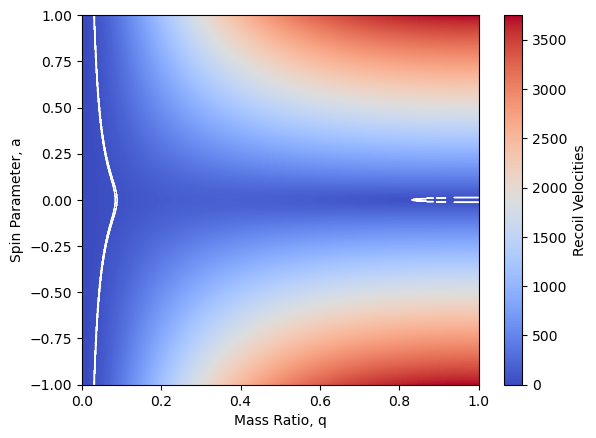

In [10]:
# MASS RATIO BY SPIN (ANTIALIGNED AND PERPENDICULAR TO ANGULAR MOMENTUM), CIRCULAR ORBIT

n = 1000
q_values = np.linspace(0, 1, n)
a_values = np.linspace(-1, 1, n)

recoil_velocities_a = []
for a in a_values:
    for q in q_values:
        recoil_velocity = calc_recoil_velocity(q, 0, a, a, 0, -np.pi/2, np.pi/2, 0)
        #print(recoil_velocity)
        recoil_velocities_a.append(recoil_velocity)
recoil_velocities_aplot = np.reshape(recoil_velocities_a, (n, n))

escape_velocity_a = []
for recoil in recoil_velocities_a:
    if 48 < recoil < 52:
        escape_velocity_a.append(recoil)
    else: 
        escape_velocity_a.append(0)
escape_velocity_aplot = np.reshape(escape_velocity_a, (n, n))

Q, A_i = np.meshgrid(q_values, a_values)
plt.pcolormesh(Q, A_i, recoil_velocities_aplot, cmap = cm.coolwarm)
plt.colorbar(label = 'Recoil Velocities')
plt.contour(Q, A_i, escape_velocity_aplot, colors='w', linewidths = .5)
plt.xlabel('Mass Ratio, q')
plt.ylabel('Spin Parameter, a')

print('The max recoil velocity for this orientation is', np.max(recoil_velocities_a)) 

The max recoil velocity for this orientation is 3247.5952641916447


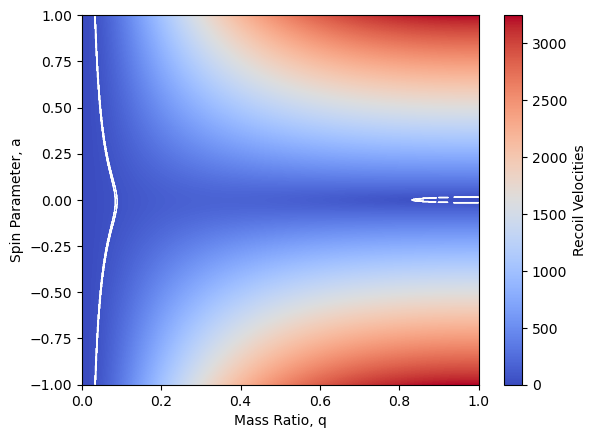

In [16]:
# MASS RATIO BY SPIN (ANTIALIGNED AND OFFSET TO ANGULAR MOMENTUM), CIRCULAR ORBIT
#This graph is symmetric regardless of xi value because the symmetric spin parameters eventually cancel out xi terms when getting v_rec mag

n = 1000
q_values = np.linspace(0, 1, n)
a_values = np.linspace(-1, 1, n)

recoil_velocities_a = []
for a in a_values:
    for q in q_values:
        recoil_velocity = calc_recoil_velocity(q, 0, a, a, np.pi/6, -np.pi/3, np.pi/3, 0)
        #print(recoil_velocity)
        recoil_velocities_a.append(recoil_velocity)
recoil_velocities_aplot = np.reshape(recoil_velocities_a, (n, n))

escape_velocity_a = []
for recoil in recoil_velocities_a:
    if 48 < recoil < 52:
        escape_velocity_a.append(recoil)
    else: 
        escape_velocity_a.append(0)
escape_velocity_aplot = np.reshape(escape_velocity_a, (n, n))

Q, A_i = np.meshgrid(q_values, a_values)
plt.pcolormesh(Q, A_i, recoil_velocities_aplot, cmap = cm.coolwarm)
plt.colorbar(label = 'Recoil Velocities')
plt.contour(Q, A_i, escape_velocity_aplot, colors='w', linewidths = .5)
plt.xlabel('Mass Ratio, q')
plt.ylabel('Spin Parameter, a')

print('The max recoil velocity for this orientation is', np.max(recoil_velocities_a))

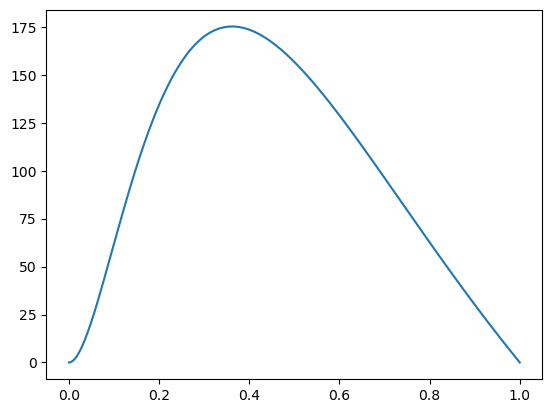

In [12]:
#PLOTS NO SPIN

n = 1000
q_values = np.linspace(0, 1, n)

recoil_velocities = []
for q in q_values:
    recoil_velocity = calc_recoil_velocity(q, 0, 0, 0, 0, np.pi, 0, 0)
    recoil_velocities.append(recoil_velocity)

plt.plot(q_values, recoil_velocities)
plt.show()